## Tracer concentration profiles upstream and downstream

In [1]:
#import gsw as sw # Gibbs seawater package
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_context('paper')
sns.set_style('white')

In [3]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonGridNoC='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc'
CanyonGridOutNoC = Dataset(CanyonGridNoC)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

# Grid variables
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
time = CanyonStateOut.variables['T']

In [4]:
# Grid, state and tracers datasets of base case
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid = xr.open_dataset(grid_file)

state_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
state = xr.open_dataset(state_file)

ptracers_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'
ptracers = xr.open_dataset(ptracers_file)

#RhoRef = np.squeeze(rdmds('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/RhoRef'))
RhoRef = 999.79998779 # It is constant in all my runs, can't run rdmds

In [5]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [24]:
ii=0
for rec in records:
    print(ii,rec.name)
    ii = ii+1
select_rec = [0]

0 CNTDIFF_run38
1 CNTDIFF_run37
2 CNTDIFF_run36
3 CNTDIFF_run45
4 CNTDIFF_run73
5 CNTDIFF_run75
6 CNTDIFF_run67
7 CNTDIFF_run51
8 CNTDIFF_run69
9 CNTDIFF_run71
10 3DVISC_run01
11 3DVISC_run02
12 3DVISC_run03
13 3DVISC_run04
14 3DVISC_run06
15 LOW_BF_run01
16 LOWER_BF_run01
17 LOWEST_BF_run01
18 LOWEST_BF_run03
19 LOWEST_BF_run05
20 LOWEST_BF_run07
21 LOWEST_BF_run11
22 3DVISC_run05


In [30]:
keys = ['Tr_profile_tt06','Tr_profile_tt08','Tr_profile_tt10','Tr_profile_tt12']
key0 = 'Tr_profile_tt00'

for record in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s.csv' %
                 (record.name,'UpSh'))
    filename2 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s.csv' %
                 (record.name,'DnSh'))
    
    df1 = pd.read_csv(filename1)
    df2 = pd.read_csv(filename2)
    
    record.CprofUp = df1[keys[2]][:]
    record.CprofUp0 = df1[key0[:]]
    
    record.CprofDn = df2[keys[2]][:]
    record.CprofDn0 = df2[key0[:]]



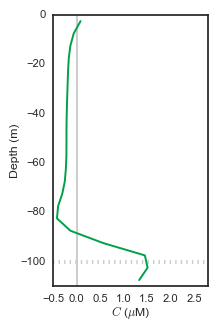

In [40]:
plt.rcParams['font.size'] = 8.0
fig, ax1 = plt.subplots(1,1,figsize = (2,3.5))

ax1.axvline(0,color='0.8',linestyle='-')
ax1.axhline(-grid.Depth[267,100],linestyle=':',color='0.8',linewidth=3)
ax1.axhline(-grid.Depth[226,100],linestyle=':',color='0.8',linewidth=3)
ax1.axhline(grid.Z[26],linestyle=':',color='0.8',linewidth=3)
   
for ind in select_rec:
    rec=records[ind]
    ax1.plot(rec.CprofUp[:48]-rec.CprofUp0[:48],grid.Z[:48],color=sns.xkcd_rgb[rec.color],label=rec.label)
    
ax1.set_xlabel('$C$ ($\mu$M)',labelpad=0.0)
ax1.set_ylabel('Depth (m)',labelpad=0.0)
#ax1.legend(bbox_to_anchor=(1.0,1.0),ncol=1,labelspacing=0.1,columnspacing=0.1,frameon=True)
ax1.set_ylim(-110,0)
ax1.set_xlim(-0.5,2.8)

plt.savefig('fig_TrProfileUps.png',format='png',bbox_inches='tight')


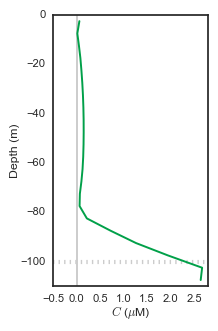

In [39]:
plt.rcParams['font.size'] = 8.0
fig, ax1 = plt.subplots(1,1,figsize = (2,3.5))

ax1.axvline(0,color='0.8',linestyle='-')
ax1.axhline(-grid.Depth[267,100],linestyle=':',color='0.8',linewidth=3)
ax1.axhline(-grid.Depth[226,100],linestyle=':',color='0.8',linewidth=3)
ax1.axhline(grid.Z[26],linestyle=':',color='0.8',linewidth=3)
   
for ind in select_rec:
    rec=records[ind]
    ax1.plot(rec.CprofDn[:48]-rec.CprofDn0[:48],grid.Z[:48],color=sns.xkcd_rgb[rec.color],label=rec.label)
    
ax1.set_xlabel('$C$ ($\mu$M)',labelpad=0.0)
ax1.set_ylabel('Depth (m)',labelpad=0.0)
#ax1.legend(bbox_to_anchor=(1.0,1.0),ncol=1,labelspacing=0.1,columnspacing=0.1,frameon=True)
ax1.set_ylim(-110,0)
ax1.set_xlim(-0.5,2.8)

plt.savefig('fig_TrProfileDns.png',format='png',bbox_inches='tight')
